# Average # of Daily Contacts by Year

Prepared by Richard Buehling

In this question, we will explore the average # of daily contacts by year.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as stats
from scipy.stats import linregress


### Prepare and Load Data

In [3]:
df = pd.read_csv('../../data/data_total2.csv', low_memory=False)

### Find Average Number of Daily Contacts for Each Year

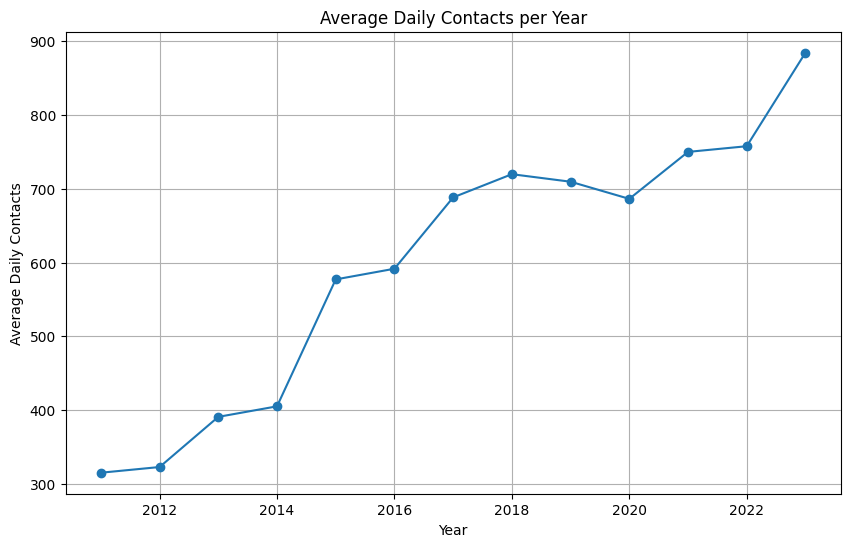

In [6]:
# Convert 'open_dt' to datetime
df['open_dt'] = pd.to_datetime(df['open_dt'])

# Extract year and date from 'open_dt'
df['year'] = df['open_dt'].dt.year
df['date'] = df['open_dt'].dt.date

# Group by year and date, and count contacts per day
daily_contacts = df.groupby(['year', 'date']).size()

# Calculate average contacts per day for each year
average_daily_contacts_per_year = daily_contacts.groupby(level=0).mean()

# Plotting
plt.figure(figsize=(10, 6))
average_daily_contacts_per_year.plot(kind='line', marker='o')
plt.title('Average Daily Contacts per Year')
plt.xlabel('Year')
plt.ylabel('Average Daily Contacts')
plt.grid(True)
plt.show()

## Linear Regression Future Predictions

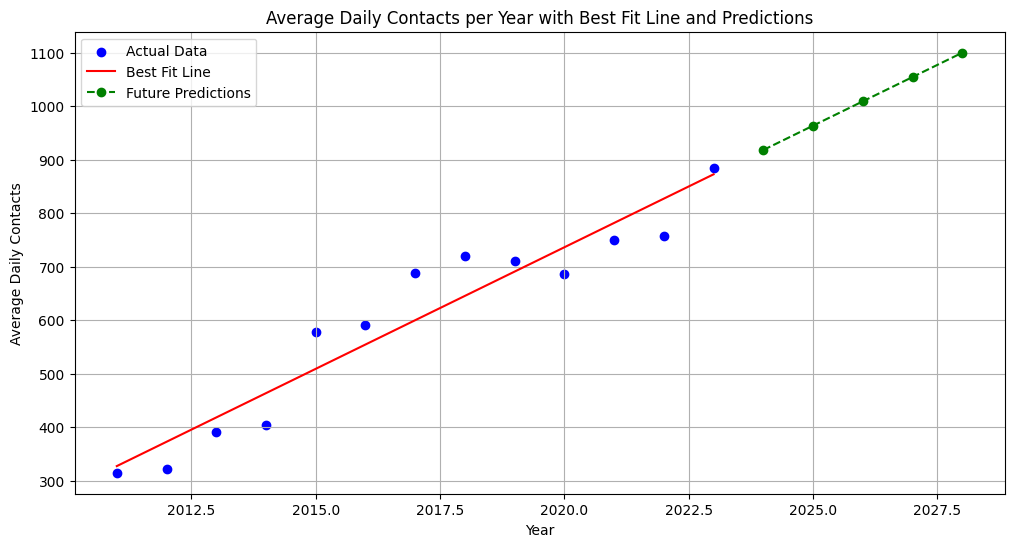

In [10]:
# Copy the original DataFrame
df_copy = df.copy()

# Convert 'open_dt' to datetime if not already done
df_copy['open_dt'] = pd.to_datetime(df_copy['open_dt'])

# Extract year and date from 'open_dt'
df_copy['year'] = df_copy['open_dt'].dt.year
df_copy['date'] = df_copy['open_dt'].dt.date

# Group by year and date, and count contacts per day
daily_contacts = df_copy.groupby(['year', 'date']).size()

# Calculate average contacts per day for each year
average_daily_contacts_per_year = daily_contacts.groupby(level=0).mean()

# Prepare data for regression
data_for_regression = average_daily_contacts_per_year.reset_index()
data_for_regression.columns = ['year', 'average_daily_contacts']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(data_for_regression['year'], data_for_regression['average_daily_contacts'])

# Generate years for prediction (e.g., next 5 years)
future_years = pd.Series(range(data_for_regression['year'].max() + 1, data_for_regression['year'].max() + 6))

# Predict future values
future_values = slope * future_years + intercept

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(data_for_regression['year'], data_for_regression['average_daily_contacts'], color='blue', label='Actual Data')
plt.plot(data_for_regression['year'], slope * data_for_regression['year'] + intercept, color='red', label='Best Fit Line')
plt.plot(future_years, future_values, color='green', linestyle='--', marker='o', label='Future Predictions')
plt.title('Average Daily Contacts per Year with Best Fit Line and Predictions')
plt.xlabel('Year')
plt.ylabel('Average Daily Contacts')
plt.legend()
plt.grid(True)
plt.show()

## Conclusions and Analysis

##### Trend Analysis:

The first graph shows the actual average daily contacts per year for Boston's 311 requests from the beginning of the dataset until the most recent complete year. The trend is generally upward, indicating an increase in the average daily contacts over time. This could suggest that either the population of Boston is increasing, leading to more requests, or that awareness and usage of the 311 service are growing.
There are some fluctuations in the data. For example, after a steady increase, there seems to be a slight drop or plateau in certain years. These variations could be due to a number of factors, such as changes in city policy, improvements in infrastructure reducing the need for requests, and external factors like Covid.


##### Linear Regression and Predictions:

The second graph includes a best-fit line determined by linear regression, overlaid on the actual data, and extends into the future with predicted values. The best-fit line suggests a consistent increase in the number of contacts over time.
The future predictions, indicated by the dashed line, suggest that if the current trend continues, the average daily contacts will continue to rise in the coming years.
It’s important to note that linear regression assumes a linear relationship throughout, and real-world data may not always follow this pattern, especially considering external factors like policy changes, technological advancements, or societal shifts.

##### Conclusions:

The increasing trend in 311 requests may indicate a growing engagement of the citizens with municipal services or increasing urban issues that require attention.
The city's 311 service and infrastructure might need to plan for increased demand in the future. This could involve scaling up resources or implementing more efficient systems to handle requests.
While the predictions provide a guideline, it is crucial for city planners and service managers to consider non-linear factors and potential future events that could significantly alter these trends.

##### Considerations:

Predictions are based on historical data and the assumption that current trends will continue. Unexpected future events can cause deviations from these predictions.
The model does not account for seasonality, which could affect the number of contacts. For instance, weather-related issues might spike requests during certain times of the year.
The underlying reasons for the trends should be investigated further to inform targeted interventions and service improvements.
In summary, the data and analysis suggest an upward trend in the use of Boston's 311 services. Planning for increased demand and investigating the factors behind this trend can help ensure the continued effectiveness and efficiency of the service.